In [6]:
'''
!pip install numpy
!pip install pandas
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install seaborn
'''

'\n!pip install numpy\n!pip install pandas\n!pip install scipy\n!pip install sklearn\n!pip install matplotlib\n!pip install seaborn\n'

In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy.stats as stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data/medical_clean.csv')

# Chi-Square Test

We're going to use Chi-Square to see if there is a significant correlation between being Overweight and readmission.

In [9]:
df['Overweight'].value_counts(normalize=True) * 100

Yes    70.94
No     29.06
Name: Overweight, dtype: float64

In [10]:
df['ReAdmis'].value_counts(normalize=True) * 100

No     63.31
Yes    36.69
Name: ReAdmis, dtype: float64

In [11]:
df['overweight_re'] = (df['Overweight']=='Yes') & (df['ReAdmis']=='Yes')
df['overweight_re'].value_counts()

False    7416
True     2584
Name: overweight_re, dtype: int64

In [12]:
df['not_overweight_re'] = (df['Overweight']=='No') & (df['ReAdmis']=='Yes')
df['not_overweight_re'].value_counts()

False    8915
True     1085
Name: not_overweight_re, dtype: int64

In [13]:
df['readmission_by_overweight'] = np.where(df['overweight_re']==True,'Overweight',
                    np.where(df['not_overweight_re']==True,'Not',None))
df['readmission_by_overweight'].value_counts()

Overweight    2584
Not           1085
Name: readmission_by_overweight, dtype: int64

Now we run the chi-square test

In [14]:
obs = df['readmission_by_overweight'].value_counts()
chi_square = stats.chisquare(obs)

We choose an alpha level of 5%, or 0.05, to compare our results to

In [15]:
chi_square[1] < 0.05

True

This tells us there is a statistically significant difference in readmission between overweight and not overweight patients.

# Univariate Analysis

We'll use univariate analysis on the continuous variables ``Population`` and ``Income`` and on the categorical variables ``ReAdmis`` and ``Overweight``

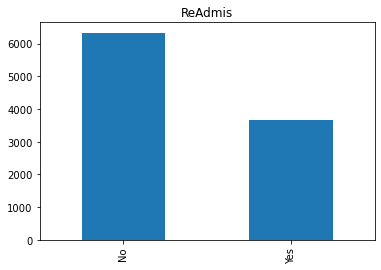

In [16]:
df['ReAdmis'].value_counts().plot(kind='bar').set_title('ReAdmis')
plt.gcf().savefig('plots/ReAdmis_bar.png')

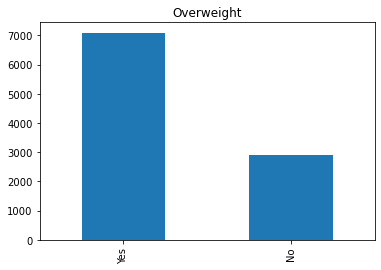

In [17]:
df['Overweight'].value_counts().plot(kind='bar').set_title('Overweight')
plt.gcf().savefig('plots/Overweight_bar.png')

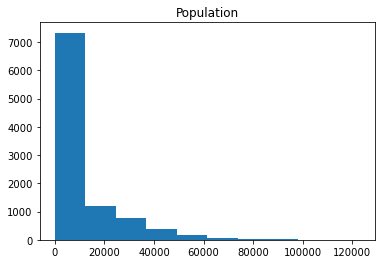

In [18]:
plt.hist(df['Population'])
plt.title('Population')
plt.gcf().savefig('plots/Population_hist.png')

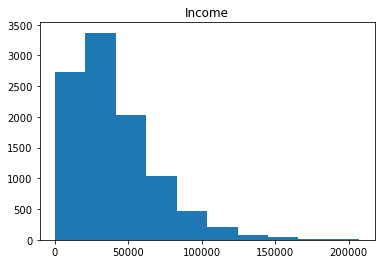

In [19]:
plt.hist(df['Income'])
plt.title('Income')
plt.gcf().savefig('plots/Income_hist.png')

# Bivariate Analysis

We'll use bivariate statistics to observe the relationship of the categorical variables ``Overweight`` and ``ReAdmis`` and the continuous variables ``Age`` and ``Initial_days``

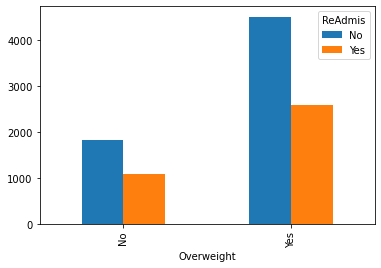

In [20]:
ct = pd.crosstab(df['Overweight'], df['ReAdmis'])
ct.plot.bar()
plt.gcf().savefig('plots/Overweight-ReAdmis_bar.png')

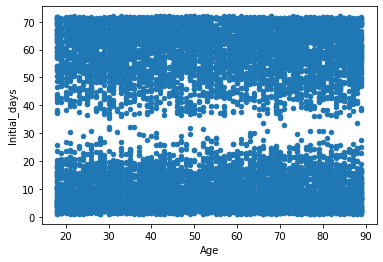

In [21]:
df.plot(kind='scatter', x='Age', y='Initial_days')
plt.gcf().savefig('plots/Age-Initial_days_scatter.png')